In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import csv

input_file = 'data/land_average_temp.txt'
output_file = 'data/land_average_temp.csv'

This short notebooks aims to import the Berkeley Earth global annual land temperature data (.txt file), calculate the average temperature for each year and convert this information into a .csv file for further analysis.

### .txt file to .csv file

Reading in the the average land temperature data from a .txt file.

In [6]:
with open(input_file, 'r') as file:
    lines = file.readlines()

#Identifying the start of the table
start_index = None
for i, line in enumerate(lines):
    if line.strip().startswith('% Year, Month,  Anomaly, Unc.,'):
        start_index = i + 1
        break

#Ensure we found the start of the table
if start_index is None:
    raise ValueError("Start of the data table not found.")

In [7]:
#Writing the data into a .csv file
with open(output_file, 'w', newline = '') as csvfile:
    writer = csv.writer(csvfile)

    #Write the header
    header = ['year', 'month', 'monthly_anomaly', 'monthly_unc', 
              'annual_anomaly', 'annual_unc', 'five_year_anomaly', 'five_year_unc', 
              'ten_year_anomaly', 'ten_year_unc', 'twenty_year_anomaly', 'twenty_year_unc']
    
    writer.writerow(header)

    #Write the data
    for line in lines[start_index:]:
        data = line.split()
        if data:
            writer.writerow(data)

### Reading in and modifying the data

In [2]:
temp_data = pd.read_csv('data/land_average_temp.csv')

In [6]:
temp_data.head()

,year,month,monthly_anomaly,monthly_unc,annual_anomaly,annual_unc,five_year_anomaly,five_year_unc,ten_year_anomaly,ten_year_unc,twenty_year_anomaly,twenty_year_unc
0,1750,1,-0.782,3.508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-1.431,3.889,-1.050,0.863,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,0.002,2.220,-1.076,0.867,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.314,1.265,-1.108,0.868,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.732,3.448,-1.426,0.878,NaN,NaN,NaN,NaN,NaN,NaN


Strok migration data contains data from years 1991 - 2017 and thus temperature data from all other years is irrelevant. For the sake of visualisations, data from years 1981-2023 is kept.

In [7]:
temp_data_range = temp_data[temp_data['year'].isin(range(1981,2024))]

Now we need an average annual temperature anomaly value for each year.

In [8]:
#Grouping by year
annual_averages = temp_data_range.groupby('year')['annual_anomaly'].mean().reset_index()

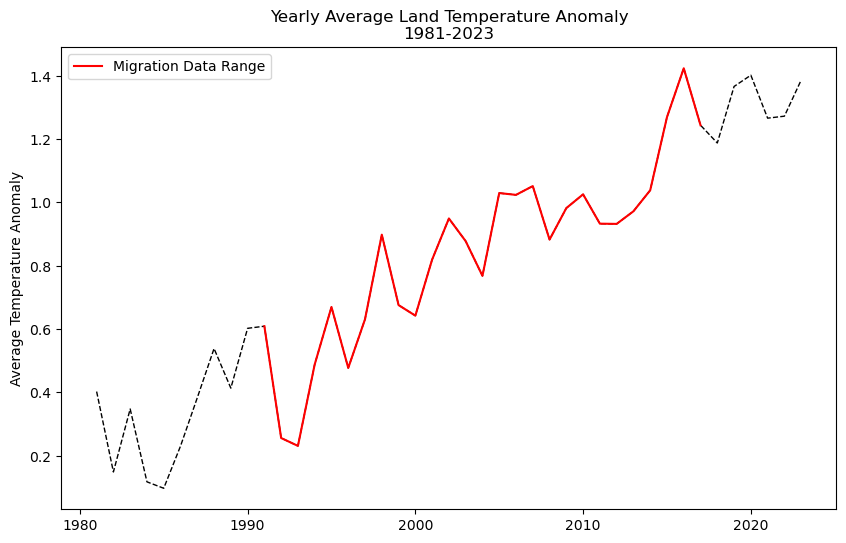

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(annual_averages['year'], annual_averages['annual_anomaly'], linestyle='--', color='k', linewidth = 1)

#Overlaying the 1991-2017 range with a solid line
data_1995_2014 = annual_averages[(annual_averages['year'] >= 1991) & (annual_averages['year'] <= 2017)]
plt.plot(data_1995_2014['year'], data_1995_2014['annual_anomaly'], linestyle='-', color='red', label='Migration Data Range')

plt.xlabel('')
plt.ylabel('Average Temperature Anomaly')
plt.title('Yearly Average Land Temperature Anomaly\n1981-2023')

plt.legend()

plt.show()

In [38]:
#annual_averages.to_csv('data/annual_avg_temp.csv')